In [1]:
# Imports
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

d:\Projects\enhancing-data-for-fact-checking-automation-leveraging-contrastive-learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load ViFactCheck

In [2]:
# Load ViFactCheck
dataset = load_dataset("tranthaihoa/vifactcheck")

# Explore available splits
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'index', 'Statement', 'Context', 'annotation_id', 'Topic', 'Author', 'Url', 'labels', 'Evidence'],
        num_rows: 5062
    })
    dev: Dataset({
        features: ['Unnamed: 0', 'index', 'Statement', 'Context', 'annotation_id', 'Topic', 'Author', 'Url', 'labels', 'Evidence'],
        num_rows: 723
    })
    test: Dataset({
        features: ['Unnamed: 0', 'index', 'Statement', 'Context', 'annotation_id', 'Topic', 'Author', 'Url', 'labels', 'Evidence'],
        num_rows: 1447
    })
})

# Data Overview

In [3]:
# Convert to pandas DataFrame for analysis
df = dataset['train'].to_pandas()

# Preview the data
df.sample(5)

,Unnamed: 0,index,Statement,Context,annotation_id,Topic,Author,Url,labels,Evidence
1779,1779,4577,Việt Nam khẳng định lập trường nguyên tắc của ...,"(Chinhphu.vn) - Ngày 6/3, Đại sứ Vũ Hồ, Quyền ...",19185936,Quốc tế,Chính Phủ,https://baochinhphu.vn/cac-nuoc-asean-nhat-tri...,2,"Về Biển Đông, Đại sứ Vũ Hồ tái khẳng định lập ..."
3776,3776,147,Kì thi tuyển sinh vào 10 diễn ra vào 6-7/6/202...,Các trường THPT chuyên tại TP HCM vẫn được tuy...,19051088,Giáo dục,VnExpress,https://vnexpress.net/hai-truong-chuyen-cua-tp...,0,"Năm nay, học sinh kỳ thi tuyển sinh vào lớp 10..."
2675,2675,4824,Ông Trần Bảo Lâm được Ban Thường vụ Tỉnh ủy Bì...,TPO - Tỉnh ủy Bình Dương chuẩn y chức danh Chủ...,18594553,XÃ HỘI,Tiền Phong,https://tienphong.vn/cong-bo-quyet-dinh-cua-ba...,1,Ban Thường vụ Tỉnh ủy Bình Dương giới thiệu ôn...
4109,4109,6193,Do bé không hợp tác nên các bác sĩ đã gây mê v...,Bệnh viện Nhi đồng 1 vừa tiếp nhận một bệnh nh...,18199706,Sức khoẻ,Thanh Niên,https://thanhnien.vn/nhet-pin-dien-tu-vao-mui-...,0,do bé không hợp tác nên không lấy được dị vật ...
3906,3906,2955,Ủy ban điều tra quốc gia Nga quyết định đưa tà...,"Ngày 28/3, tàu Soyuz MS-22 không người lái của...",19465855,KHOA HỌC CÔNG NGHỆ,Tin Tức,https://baotintuc.vn/khoa-hoc-cong-nghe/tausoy...,2,Ủy ban điều tra quốc gia Nga quyết định đưa tà...


In [4]:
import json

# Generate a JSON object with exemplary values for each column
example_row = df.iloc[0].to_dict()  # Get the first row as an example
json_object = json.dumps(example_row, indent=4, ensure_ascii=False)
print(json_object)

{
    "Unnamed: 0": 0,
    "index": 3049,
    "Statement": "Phó Thủ tướng Trần Hồng Hà thay mặt Chính phủ, Thủ tướng Chính phủ chúc mừng Đài Truyền hình Việt Nam, Đài truyền hình các tỉnh, thành phố trên cả nước, các đơn vị sản xuất truyền hình và TP. Hải Phòng sau 2 năm gián đoạn do đại dịch COVID-19  đã tổ chức rất thành công sự kiện quan trọng này.",
    "Context": "(Chinhphu.vn) - Đây là mong muốn, gửi gắm của Phó Thủ tướng Trần Hồng Hà đến những người làm truyền hình tại lễ bế mạc Liên hoan Truyền hình toàn quốc lần thứ 41, tối 18/3, tại TP. Hải Phòng. Phó Thủ tướng Trần Hồng Hà: Các tác phẩm truyền hình đã vun đắp, làm giàu cho nền văn hóa Việt Nam tiên tiến, đậm đà bản sắc dân tộc, góp phần tạo dựng môi trường văn hóa lành mạnh và xây dựng con người Việt Nam nhân cách, trách nhiệm, hội nhập - Ảnh: VGP/Minh Khôi Tham dự lễ bế mạc còn có Bí thư Trung ương Đảng, Trưởng Ban Tuyên giáo Trung ương Nguyễn Trọng Nghĩa, lãnh đạo các bộ, ngành Trung ương, địa phương, đại diện các đài truy

In [5]:
dev_df = dataset['dev'].to_pandas()

# Generate a JSON object with exemplary values for each column
example_row = dev_df.iloc[0].to_dict()  # Get the first row as an example
json_object = json.dumps(example_row, indent=4, ensure_ascii=False)
print(json_object)

{
    "Unnamed: 0": 0,
    "index": 6040,
    "Statement": "Vào tháng 4.1930 TL Nhà vua Na Uy Harald V, Vua hề Charlie Chaplin (vua hề Sác lô) và vợ từng trải qua kỳ nghỉ trăng mật tại khách sạn Saigon Morin tại phòng Charlie Chaplin Suite.",
    "Context": "Saigon Morin, khách sạn 4 sao hàng đầu tại Huế, kỷ niệm 122 năm ra đời tối 26.3, là một trong những khách sạn lâu đời nhất Việt Nam với \"bảng vàng\" danh sách các yếu nhân và nguyên thủ quốc gia từng lưu trú. Khách sạn có 4 mặt tiền thuộc các giao lộ Lê Lợi - Hùng Vương, Hoàng Hoa Thám - Trương Định (TP.Huế, Thừa Thiên-Huế) bên cạnh cầu Trường Tiền với \"view\" sông Hương thơ mộng, Phó chủ tịch thường trực UBND tỉnh Thừa Thiên-Huế, ông Nguyễn Thanh Bình (phải), trao cờ đơn vị dẫn đầu thi đua có nhiều đóng góp cho du lịch của tỉnh cho ông Trần Văn Lâm, Tổng giám đốc Saigon Morin, tại lễ kỷ niệm 122 năm HƯƠNG GIANG Khách sạn ra đời vào năm 1901 khi ông Henri Bogaert, chủ nhà máy gạch ngói Long Thọ, cho khởi công xây dựng và lấy tên 

In [6]:
test_df = dataset['test'].to_pandas()

# Generate a JSON object with exemplary values for each column
example_row = test_df.iloc[0].to_dict()  # Get the first row as an example
json_object = json.dumps(example_row, indent=4, ensure_ascii=False)
print(json_object)

{
    "Unnamed: 0": 0,
    "index": 1383,
    "Statement": "Bộ xương bản sao được đưa đến Lodon bằng cách nghép thành con hoàn chỉnh rồi vận chuyển đến.",
    "Context": "Bản sao bộ xương hóa thạch của một trong những loài khủng long lớn nhất từng sải bước trên Trái Đất chuẩn bị chính thức được trưng bày tại Bảo tàng Lịch sử tự nhiên ở thủ đô London của Anh. Đây là lần đầu tiên bản sao hóa thạch bộ xương khủng long này được triển lãm ở châu Âu kể từ khi bản gốc được phát hiện ở Patagonia, một vùng hoang dã nằm ở phía Nam thành phố Neuquen, Argentina. Cách đây nhiều năm, các nhà khoa học ở Argentina đã phát hiện một trong những loài khủng long lớn nhất từng tồn tại trên Trái Đất là Patagotitan mayorum. Loài này thuộc họ titanosaur, một họ khủng long ăn cỏ có đầu nhỏ và thân hình to lớn, sống cách đây khoảng 95 - 100 triệu năm. Patagotitan mayorum nặng tới 69 tấn, dài 37m và cao gần 6m, tương đương với kích thước của 12 con voi châu Phi trưởng thành. Theo các nhà nghiên cứu, với chiếc cổ

# EDA

In [7]:
# Schema and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5062 entries, 0 to 5061
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5062 non-null   int64 
 1   index          5062 non-null   int64 
 2   Statement      5062 non-null   object
 3   Context        5062 non-null   object
 4   annotation_id  5062 non-null   int64 
 5   Topic          5062 non-null   object
 6   Author         5062 non-null   object
 7   Url            5062 non-null   object
 8   labels         5062 non-null   int64 
 9   Evidence       5062 non-null   object
dtypes: int64(4), object(6)
memory usage: 395.6+ KB


Unnamed: 0       0
index            0
Statement        0
Context          0
annotation_id    0
Topic            0
Author           0
Url              0
labels           0
Evidence         0
dtype: int64

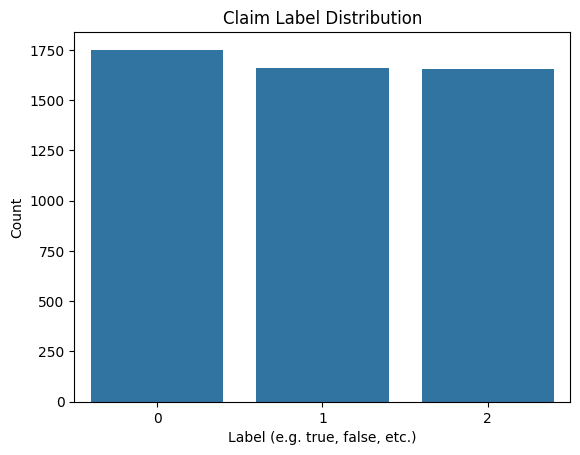

In [10]:
# Target label distribution
sns.countplot(data=df, x='labels')
plt.title('Claim Label Distribution')
plt.xlabel('Label (e.g. true, false, etc.)')
plt.ylabel('Count')
plt.show()

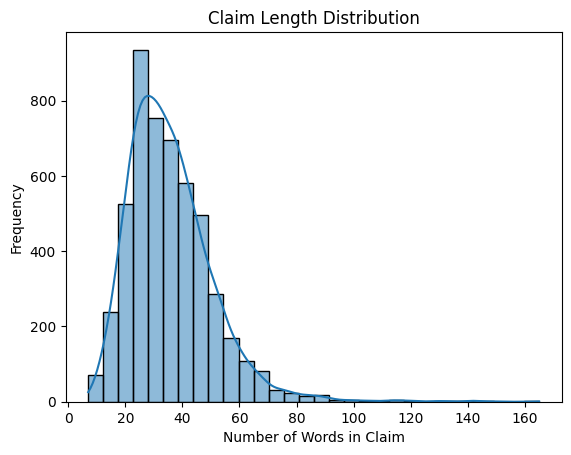

In [11]:
# Claim lengths
df['claim_length'] = df['Statement'].apply(lambda x: len(x.split()))

sns.histplot(df['claim_length'], bins=30, kde=True)
plt.title('Claim Length Distribution')
plt.xlabel('Number of Words in Claim')
plt.ylabel('Frequency')
plt.show()

# Label-wise Analysis

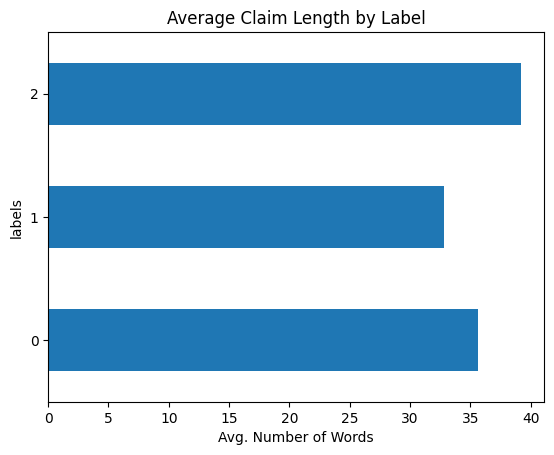

In [12]:
# Avg claim length by label
df.groupby('labels')['claim_length'].mean().plot(kind='barh')
plt.title('Average Claim Length by Label')
plt.xlabel('Avg. Number of Words')
plt.show()

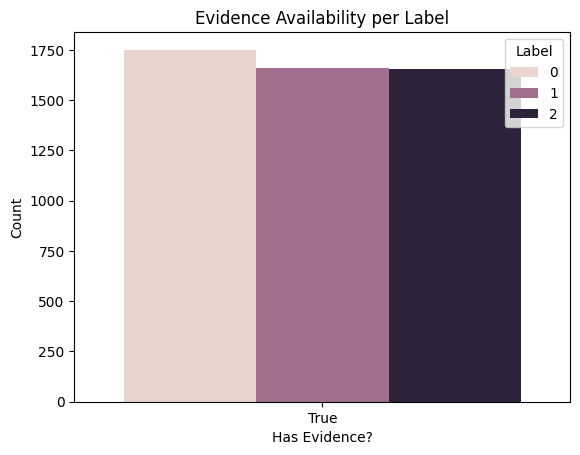

In [14]:
# Evidence analysis
df['has_evidence'] = df['Evidence'].apply(lambda x: len(x) > 0)

sns.countplot(data=df, x='has_evidence', hue='labels')
plt.title('Evidence Availability per Label')
plt.xlabel('Has Evidence?')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()


# Linguistics Insights

In [15]:
# Common Vietnamese stopwords? Unusual characters?
from collections import Counter

# Top words in claims
all_words = ' '.join(df['Statement'].tolist()).split()
common_words = Counter(all_words).most_common(20)

pd.DataFrame(common_words, columns=['word', 'frequency'])

,word,frequency
0,và,2907
1,của,2140
2,các,1913
3,có,1704
4,được,1585
5,đã,1545
6,trong,1464
7,là,1369
8,cho,1281
9,với,1156


# Export Data

In [17]:
!mkdir -p data
df['Statement'].to_csv('data/statements.csv', index=False)

In [19]:
df['Statement'].head(100).to_csv('data/statements_100.csv', index=False)